<a href="https://colab.research.google.com/github/Sanika2112/CODTECH-Task-02/blob/main/Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEXT-TO-IMAGE GENERATION APPLICATION
Develop a text-to-image generation application that takes textual
descriptions as input and produces corresponding visual
representations or images. The application should leverage
techniques from the field of generative models

## 1. Library Installation and Imports

In [1]:
# Install necessary libraries
!pip install --upgrade diffusers transformers accelerate torch matplotlib -q

# Import required libraries
from pathlib import Path
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## 2. Configuration Setup

In [2]:
# Configuration class for setup
class CFG:
    device = "cuda" if torch.cuda.is_available() else "cpu"  # Use CUDA if available
    seed = 42  # Random seed for reproducibility
    generator = torch.Generator(device).manual_seed(seed)  # Initialize the generator with the seed
    image_gen_steps = 200  # Steps for better image quality
    image_gen_model_id = "stabilityai/stable-diffusion-2-1"  # Model ID for Stable Diffusion
    image_gen_size = (3840, 2160)  # 4K resolution
    image_gen_guidance_scale = 15.0  # Guidance scale for detailed images
    output_dir = Path("./generated_images")  # Directory to save images
    prompt_max_length = 20  # Max length for filename prompt
    num_images_to_generate = 1  # Number of images per prompt

# Ensure output directory exists
CFG.output_dir.mkdir(parents=True, exist_ok=True)

## 3. Model Loading

In [3]:
# Load the Stable Diffusion model from Hugging Face
def load_model():
    """
    Loads the Stable Diffusion model with specified configuration.
    """
    image_gen_model = StableDiffusionPipeline.from_pretrained(
        CFG.image_gen_model_id,
        torch_dtype=torch.float16,  # Use float16 precision
        use_auth_token='your_hugging_face_auth_token'  # Replace with your token
    )
    image_gen_model = image_gen_model.to(CFG.device)  # Move to appropriate device
    return image_gen_model

## 4. Image Generation

In [4]:
# Generate a single image from a prompt
def generate_image(prompt, model, save_images=False):
    """
    Generate an image based on the given text prompt.
    """
    try:
        # Generate the image
        image = model(prompt,
                      num_inference_steps=CFG.image_gen_steps,
                      generator=CFG.generator,
                      guidance_scale=CFG.image_gen_guidance_scale).images[0]

        # Resize to desired size
        image = image.resize(CFG.image_gen_size)

        # Save the image if required
        if save_images:
            save_path = CFG.output_dir / f"{prompt[:20]}_generated.png"
            image.save(save_path)
            print(f"Image saved at: {save_path}")

        return image
    except Exception as e:
        print(f"Error generating image for prompt '{prompt}': {e}")
        return None

## 5. Image Display

In [5]:
# Display the generated image
def display_image(image):
    """
    Display an image using matplotlib.
    """
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

## 6. Generate Multiple Images

In [6]:
# Generate multiple images for multiple prompts
def generate_images_for_prompts(prompts, model, num_images=1, save_images=False):
    """
    Generate multiple images for a list of prompts.
    """
    for prompt in prompts:
        print(f"Generating images for prompt: {prompt}")
        for i in range(num_images):
            image = generate_image(prompt, model, save_images)
            if image:
                display_image(image)
            else:
                print(f"Failed to generate image for prompt '{prompt}'")

## 7. Main Execution

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Keyword arguments {'use_auth_token': 'your_hugging_face_auth_token'} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]



Enter a prompt for image generation:
A stunning view of an ancient stone hindu temple with intricate carvings of gods and goddesses surrounded by lush greenery and misty mountains in the distance.


How many images would you like to generate?
2
Generating images for prompt: A stunning view of an ancient stone hindu temple with intricate carvings of gods and goddesses surrounded by lush greenery and misty mountains in the distance.


  0%|          | 0/200 [00:00<?, ?it/s]

Image saved at: generated_images/A stunning view of a_generated.png


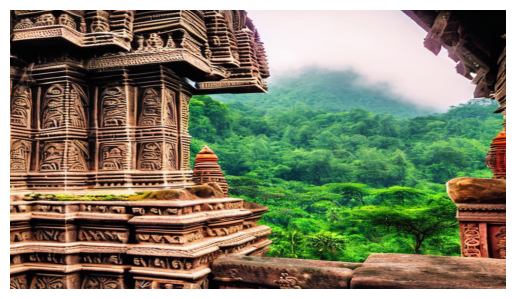

  0%|          | 0/200 [00:00<?, ?it/s]

Image saved at: generated_images/A stunning view of a_generated.png


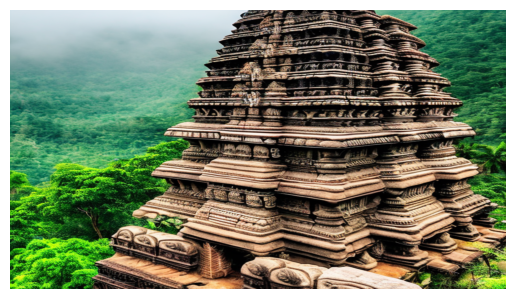


Do you want to generate more images? (yes/no):
no
Exiting the image generation process.


In [7]:
if __name__ == "__main__":
    # Load the Stable Diffusion model
    image_gen_model = load_model()

    while True:
        # Get user input for prompt and number of images
        prompt = input("\n\nEnter a prompt for image generation:\n")
        try:
            num_images = int(input("\n\nHow many images would you like to generate?\n"))
        except ValueError:
            print("Invalid number. Please enter an integer.")
            continue

        # Generate and display images
        generate_images_for_prompts([prompt], image_gen_model, num_images=num_images, save_images=True)

        # Option to exit
        end = input("\nDo you want to generate more images? (yes/no):\n").strip().lower()
        if end == "no":
            print("Exiting the image generation process.")
            break